# Convergence rates for Gaussian filters

In this notebook, we illustrate the usage of pn-diffeq through computing convergence rates of Gaussian ODE filters. See

https://arxiv.org/pdf/1807.09737.pdf

for analysis and many more experiments!

To illustrate, we use IVPs which allow a closed form solution. We start with the logistic ODE.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from probnum.diffeq import ode, odefiltsmooth
from probnum.prob import RandomVariable, Dirac


The logistic ODE as well as some others (Lotka-Volterra, FitzHugh-Nagumo, ...) are readily implemented in the `ode` module. To set them up, we need a random variable as initial values, e.g. a Dirac-distribution.

In [46]:
initdist = RandomVariable(distribution=Dirac(0.15 * np.ones(1)))
ivp1 = ode.logistic([0.0, 1.5], initdist, params=(5, 1))
arr = (np.array([ivp1.solution(0.) for i in range(2)]))


Solving IVPs is probably easiest with the function `filter_ivp_h()` where the ending `_h()` implies that we use constant step sizes. Adaptive steps are not ready for the public yet.

Note that the outputs contain estimates for the derivatives. To extract each coordinate, we slice accordingly.

95366443.32586125
100150228.67592512
104856571.79213706
109417961.08338688
113762952.62287356
117818906.63209623
121515233.08495468
124786912.14074926
127577978.76267752
129844624.19001378
131557583.95511182
132703555.81469467
133285510.74113894
133321901.79442069
132844911.9996618
131897986.3640204
130532949.40134111
128807013.89062695
126779947.98544618
124511600.81177394
122059909.68761566
119479439.23908164
116820444.11665139
114128407.28717275
111443984.72932173
108803282.41096616
106238398.79804488
103778182.40333323
101449176.59943518
99276752.45135409
97286466.07905819
95505724.56980066
93965912.68250722
92705238.43821715
91772730.74484193
91234127.1986589
91180946.719872
91745104.36441167
93123556.14602077
95621973.69960646
99736631.48839311
106318466.48443052
116929294.46144016
134697027.5605393
166654136.9790661
231364123.5668598
391030465.78142035
955999146.6212871
5518250876.112525
343518688569.9746
95366244.27582566
100150002.38411106
104856316.271336
109417674.66021879
1

132612514.6566967
164044274.8843261
227723415.59648076
384922211.00069165
941423236.4364551
5437500479.476785
338697968450.6137
94336687.33619371
98981701.265614
103539379.46174578
107943896.67789991
112126109.6564542
116016257.34577237
119547108.79746439
122657324.44457525
125294730.37688917
127419178.34622614
129004688.80816038
130040650.93963543
130531969.26584026
130498180.38384528
129971687.1419433
128995349.9246757
127619720.90073353
125900206.11623032
123894400.27777436
121659775.1093383
119251829.90971838
116722745.94920486
114120533.16351685
111488621.8955859
108865834.03981583
106286664.25376615
103781809.45837821
101378900.56126817
99103411.9746387
96979751.71700673
95032569.15063213
93288363.0842044
91777539.03249855
90537167.11591257
89614862.32419388
89074505.68381855
89005066.78965019
89534823.23704319
90855348.08027865
93264033.08758664
97243839.97025736
103623125.00464338
113922757.1052515
131189732.27345075
162277248.2246979
225283084.14909312
380877095.1339056
931899

18617451431.634876
25021453162.545975
34429789671.73161
48702528276.49478
71191436731.95946
108275497266.17654
172922139794.38782
293717972801.4807
540455747129.32623
1107641867845.8066
2642612130383.919
7898812364520.314
33072490698780.145
184113033914452.3
720000407179375.9


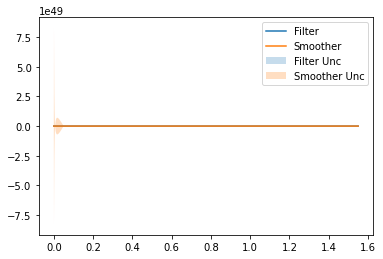

In [42]:
step = 0.05
nsteps_ = int(step / 0.001)
ms, cs, ts = odefiltsmooth.filter_ivp_h(ivp1, step, which_prior="ibm2", which_filt="ekf", nsteps=nsteps_)
ms2, cs2, ts2 = odefiltsmooth.smoother_ivp_h(ivp1, step, which_prior="ibm2", which_filt="ekf", nsteps=nsteps_)
means = ms[:, 1]
means2 = ms2[:, 1]
stdevs = np.sqrt(cs[:, 1, 1])
stdevs2 = np.sqrt(np.abs(cs2[:, 1, 1]))

sols = np.array([ivp1.solution(t) for t in ts])
plt.plot(ts, means, "-", label="Filter")
plt.plot(ts2, means2, "-", label="Smoother")

plt.fill_between(ts, means-3*stdevs, means+3*stdevs,  alpha=0.25, label="Filter Unc")

plt.fill_between(ts2, means2-3*stdevs2, means2+3*stdevs2,  alpha=0.25, label="Smoother Unc")
# plt.plot(ts, sols, alpha=0.25, linewidth=6, label="Truth")
plt.legend()
plt.show()


## Convergence rates of KF

We compare the convergence rates of the "classic" Kalman ODE filter on the IBM(1) prior. To this end, we comput the average error on each time step and the average standard deviation.

33.03867410558048
32.96565687115256
32.89194896033589
32.81755129193538
32.74246483759088
32.66669062172425
32.59022972147323
32.51308326661536
32.43525243947927
32.35673847484508
32.27754265983251
32.197666333778486
32.1171108881022
32.03587776615911
31.95396846308318
31.871384525617998
31.7881275519356
31.704199191444562
31.619601144586042
31.534335162619044
31.448403047393185
31.361806651111625
31.274547876080934
31.18662867445125
31.09805104794418
31.008817047569966
30.91892877333328
30.82838837392847
30.73719804642339
30.645360035932256
30.552876635278267
30.459750184644687
30.365983071216142
30.271577728808737
30.17653663748988
30.080862323187734
29.984557357290697
29.887624356236298
29.79006598109024
29.69188493711576
29.593083973332664
29.493665882067262
29.393633498492278
29.292989700157587
29.19173740651182
29.089879578414234
28.987419217638248
28.884359366365743
28.780703106672732
28.67645356000636
28.571613886653708
28.466187285202043
28.36017699199137
28.253586280558707
28

6.745692307294787
6.5583166530452965
6.370919758084703
6.183503391788432
5.996069257429262
5.8086189921089275
5.621154166700046
5.433676285799368
5.246186787693939
5.058687044342349
4.871178361374246
4.6836619781125135
4.496139067624695
4.308610736813096
4.121078026557869
3.9335419119345487
3.7460033025396124
3.5584630429771886
3.3709219135940187
3.1833806316095656
2.9958398528989187
2.8083001748999035
2.6207621415524813
2.4332262521291375
2.245692978053748
2.058162797615575
1.870636275555078
1.683114273739067
1.4955986401060584
1.3080954133687022
1.1206479130890128
1.0720251087903798
1.3414644207964457
1.7922167637554685
2.699266360897907
5.465332736029262
49.54271538788028
49.481505584559166
49.41894752009009
49.35503753791474
49.289772102830625
49.22314780234473
49.155161347997655
49.08580957666504
49.01508945182939
48.942998064828
48.86953263607044
48.794690516226915
48.71846918738947
48.640866264200696
48.56187949495233
48.481506762652494
48.399746086059984
48.31659562068575
48.23

288.7484059771324
291.4469378480022
294.18431113606806
296.9612746203705
299.7785952119673
302.6370584834098
305.53746921630847
308.4806519677631
311.4674516563318
314.4987341684186
317.5753869857737
320.69831983507
323.86846536032385
327.0867798192319
330.3542438042333
333.67186298943574
337.04066890444267
340.4617197361492
343.9361011596605
347.46492719970337
351.0493411235398
354.69051636701306
358.38965749487596
362.14800119703824
365.9668173221843
369.84740995041466
373.7911185065467
377.79931891596954
381.87342480476434
386.01488874612215
390.2252035551681
394.50590363418024
398.8585663706833
403.28481359057
407.7863130689976
412.36478010137614
417.0219791375473
421.75972548182176
426.5798870619853
431.48438627064854
436.4752018819992
441.55437104788604
446.7239913768137
451.9862230997036
457.3432913269336
462.7974884006148
468.35117634714453
474.0067894347475
479.76683684109634
485.63390543675166
491.6106626897637
497.6998596980429
503.90433435543224
510.22701465866777
516.67092

347.9971743119457
346.7863997008332
345.5171280678805
344.1897933324815
342.80488230100747
341.3629340999125
339.8645394940685
338.3103400923237
336.7010274429003
335.0373420215699
333.3200721161179
331.55005261103497
329.72816367667065
327.85532936766384
325.9325161356822
323.9607312619155
321.9410212150536
319.8744699408094
317.76219708918165
315.60535618603035
313.4051327555667
311.1627424005876
308.8794288474065
306.556461962442
304.19513574754734
301.7967663211301
299.3626898920958
296.8942607336365
294.39284916374754
291.8598395393196
289.2966282704658
286.7046218616416
284.08523498592547
281.4398885986364
278.7700080962974
276.0770215267189
273.36235785578265
270.6274452962789
267.8737097039517
265.1025730456742
262.315451944506
259.51375630616735
256.6988880313138
253.87223981784774
251.03519405736475
248.1891218297716
245.3353820000342
242.47532042103236
239.61026924652725
236.74154635835413
233.870454912131
230.99828300600768
228.1263034773247
225.25577383247713
222.387936315

25.35916422915908
25.01376327516306
24.668080199097965
24.32222721428623
23.97632773362106
23.63051790786043
23.284948422359786
22.93978660412647
22.59521890332474
22.25145382895354
21.90872543841149
21.567297506472922
21.2274685327749
20.889577790935725
20.55401268063903
20.221217721684063
19.891705633636484
19.566071087119173
19.245007908758943
18.92933079469992
18.620002972501634
18.318171801671234
18.025215102111023
17.742802178753017
17.472975281593882
17.218259953048776
16.981816960577746
16.76765531971625
16.580937121346672
16.428423895439884
16.31914762720645
16.265450456022865
16.284653313220474
16.401847377099806
16.654801694657472
17.103130516072973
17.846766437695507
19.067011705955935
21.13061758108717
24.90867315179197
33.09897339155424
196.66616763769198
198.1585417458297
199.66852842737433
201.19640573539562
202.74245723276636
204.30697212370117
205.89024538899665
207.49257792503863
209.11427668673747
210.75565483451527
212.41703188546842
214.09873386885565
215.80109348

97.12756884490078
96.6457628267939
96.15697094156344
95.66123182002649
95.15858573967554
94.64907460491962
94.13274192616372
93.6096327977528
93.07979387479594
92.54327334888728
92.0001209227522
91.45038778383612
90.89412657686374
90.33139137539212
89.76223765238548
89.18672224983732
88.60490334747371
88.0168404305618
87.42259425685748
86.822226822727
86.21580132846725
85.60338214286878
84.985034767045
84.36082579757384
83.73082288897794
83.0950947155859
82.4537109328096
81.80674213787407
81.154259830038
80.4963363703467
79.83304494094882
79.16445950402203
78.49065476034302
77.81170610754187
77.12768959807843
76.4386818969824
75.74476023939101
75.04600238792884
74.34248658996319
73.63429153477503
72.92149631068487
72.20418036216725
71.48242344699311
70.75630559343904
70.02590705759054
69.29130828078664
68.5525898472296
67.80983244179976
67.06311680810788
66.31252370681445
65.55813387425178
64.80002798137542
64.03828659307823
63.27299012789281
62.50421881811351
61.732052670361256
60.956

62.22235821130633
60.76815030669137
59.31064300321307
57.84999425502749
56.38635875275118
54.91988784956008
53.45072949061423
51.979028145776255
50.50492474558667
49.02855662045428
47.55005744301438
46.06955717360362
44.587182008794294
43.10305433292947
41.61729267259248
40.13001165394432
38.64132196285623
37.151330307762805
35.66013938515777
34.16784784765141
32.674550274506615
31.180337144568664
29.6852948115018
28.189505481245053
26.693047191600073
25.195993793863988
23.698414936424893
22.200376050242895
20.701938336152786
19.203158753946724
17.704090013236847
16.204780566178506
14.705274602294715
13.205612045980551
11.705828558032751
10.205955544439924
8.706020180871704
7.20604547782768
5.70605047532648
194.60462670849
194.25360259077772
193.88094778620442
193.48651222179072
193.07015327032738
192.63173594653165
192.17113309749695
191.6882255870248
191.1829024734298
190.65506118041532
190.10460766062667
189.53145655149268
188.93553132297845
188.3167644168801
187.67509737729856
187.

566.0428065146292
570.3916383388472
574.7212057888376
579.0282342793796
583.3093196735035
587.5609271849959
591.7793905825388
595.9609117233582
600.1015604454883
604.1972748480908
608.2438619901117
612.23699903774
616.1722348914483
620.044992323481
623.8505706561147
627.5841490109244
631.2407901582113
634.8154449947284
638.3029576765196
641.6980714318906
644.9954350772213
648.1896102560282
651.2750794187122
654.2462545567467
657.0974867018278
659.8230761957676
662.4172837325169
664.8743421687213
667.1884690933093
669.3538801412826
671.3648030303235
673.2154922921956
674.9002446643444
676.413415099993
677.7494333473728
678.9028210421486
679.8682092490549
680.640356381789
681.2141664230961
681.584707359986
681.7472297424251
681.6971852680034
681.4302452892739
680.9423191358436
680.2295721389486
679.2884432433082
678.11566208857
676.7082654415316
675.0636128602872
673.1794014723564
671.0536797513894
668.6848601804719
666.0717306950396
663.213464804334
660.1096302978972
656.760196452173
65

302.1389081827255
294.4490654982843
286.76890001024566
279.10267114583587
271.4545330274634
263.828540322554
256.2286562417887
248.65876304692242
241.12267553972376
233.62415815193958
226.16694645706713
218.75477419931426
211.39140731433682
204.08068694612885
196.8265842139699
189.6332705585932
182.50520906271927
175.44727445995338
168.46491304243108
161.56435905578877
154.7529326269938
148.0394578978442
141.43486260282685
134.95305886175473
128.6122730776155
122.4371181388183
116.46194245707231
110.73648077703311
105.33589379127842
100.37976807549235
96.07104127306994
92.784400950729
91.2972460677075
478.871996690241
481.0538480486424
483.18070124525997
485.2499305683487
487.2588777834035
489.20485530366875
491.0851495993497
492.8970248473272
494.63772682185004
496.30448702569197
497.89452706004505
499.40506322993065
500.8333113806832
502.1764919594148
503.43183529408265
504.59658708083094
505.6680140690427
506.6434099314409
507.5201013052908
508.2954539887001
508.96687927444185
509.5

112.25577445211924
110.80990527027346
109.35889282976133
107.90303641184806
106.44263287176939
104.97797647447028
103.50935873795567
102.03706828449715
100.56139069994336
99.08260840138578
97.60100051343896
96.11684275340741
94.63040732562654
93.14196282528498
91.65177415206477
90.16010243396693
88.66720496173234
87.17333513431888
85.67874241595571
84.18367230537115
82.6883663178788
81.19306198111474
79.69799284534642
78.20338850942906
76.70947466366894
75.21647315107805
73.72460204876813
72.23407577155753
70.74510520025169
69.25789783752903
67.77265799493767
66.2895870152059
64.80888353492308
63.3307437936996
61.85536199720926
60.382930743127055
58.91364152097929
57.44768529943702
55.985253217751094
54.52653740204461
53.07173193230656
51.62103399251777
50.17464524486901
48.73277348014751
47.29563461098987
45.86345509407887
44.43647489330185
43.014951130937575
41.59916262180312
40.18941555138529
38.78605065136641
37.38945235676905
36.00006061680675
34.61838630546841
33.2450315840203
31

917.9496232362928
933.7178348726751
949.8990593815911
966.5078654354813
983.5594706083599
1001.0697764140718
1019.0554055741976
1037.5337416803545
1056.52297142741
1076.0421296110576
1096.1111470980425
1116.7509019965842
1137.9832742727588
1159.831204081975
1182.3187541068555
1205.4711762196155
1229.3149828162186
1253.8780232001052
1279.1895654292894
1305.2803840783693
1332.1828544098425
1359.9310534962578
1388.5608688867137
1418.110115468037
1448.6186612375643
1480.128562771769
1512.6842112574034
1546.3324900383109
1581.1229447282517
1617.1079670520348
1654.3429936968685
1692.8867215936025
1732.8013412015387
1774.152789540656
1817.0110249087568
1861.4503254381332
1907.549613889974
1955.3928113609638
2005.069222886787
2056.673958279033
2110.30839193355
2166.0806657953167
2224.1062401854783
2284.5084977768806
2347.4194066752034
2412.9802493246016
2481.342424832794
2552.6683333072806
2627.132351953522
2704.9219140046384
2786.2387030856953
2871.299977383886
2960.3400400454275
3053.6118745

177.5226478223885
175.10791617047522
172.66690577349166
170.2002604916437
167.70862970253893
165.19266748632594
162.6530318114923
160.09038372291027
157.50538653370717
154.89870502248135
152.27100463733092
149.62295070812823
146.95520766839402
144.26843828808438
141.56330291852862
138.84045875069376
136.10055908788368
133.34425263390622
130.57218279767204
127.7849870151145
124.98329608924216
122.16773354906036
119.3389150280252
116.49744766260945
113.64392951149271
110.7789489958035
107.9030843607741
105.01690315908925
102.12096175614154
99.21580485733475
96.30196505750747
93.37996241248393
90.45030403269608
87.51348369875855
84.5699814988225
81.62026348747939
78.66478136593567
75.70397218313488
72.73825805746445
69.76804591864872
66.79372726940979
63.81567796646116
60.834258020403325
57.84981141411559
54.86266593929552
51.87313305090687
48.88150773948631
45.88806842158196
42.89307684914686
39.89677803965823
36.899400230412816
33.90115486352349
30.902236614005915
27.90282348511412
24.9

160.15775952558258
155.0255518052413
149.87225744120707
144.69931258377665
139.50811476399278
134.30002126522305
129.07634759844817
123.83836608047424
118.5873045139202
113.32434496749374
108.05062265478608
102.76722490958947
97.47519025558921
92.17550756824828
86.86911532682886
81.5569009548797
76.23970024833073
70.91829689187267
65.59342206715154
60.265754161628074
54.93591859716691
49.60448781787297
44.271981519980294
38.93886730480243
364.98238896881844
361.9091235188295
358.73785317090733
355.46939867101935
352.10466789783163
348.6446543345972
345.09043531680135
341.443170060585
337.7040974781425
333.87453378714736
329.95586992222235
325.9495687574017
321.85716214928146
317.6802478113899
313.420486030956
309.0795962399285
304.6593534526115
300.16158458278113
295.5881646535231
290.94101291337074
286.2220888724966
281.43338827290444
276.5769390065838
271.65479699558495
266.66904204786357
261.62177370252414
256.51510707788736
251.351168735408
246.13209257212077
240.86001575378492
235

1604.5310591537932
1615.6414113547546
1626.0072399234157
1635.5720257690787
1644.278294097653
1652.067858031593
1658.8820900474466
1664.6622208414317
1669.3496647344873
1672.8863701846205
1675.2151933883722
1676.2802923398224
1676.0275380849635
1674.4049392756529
1671.363075513934
1666.8555343957596
1660.839346641606
1653.2754132557764
1644.1289183119593
1633.3697207364662
1620.9727183732289
1606.9181776800785
1591.1920226333928
1573.7860768159971
1554.6982532296522
1533.932687101103
1511.4998078293654
1487.4163472304547
1461.705282349451
1434.3957122987556
1405.5226698122558
1375.1268694398582
1343.254395509743
1309.9563341177434
1275.2883544322021
1239.310245495573
1202.085415436965
1163.6803605621783
1124.1641121483062
1083.6076689324473
1042.0834232514048
999.6645885704783
956.4246357490349
912.4367448498557
867.7732786320777
822.5052831012082
776.7020196535544
730.4305324754787
683.7552539701464
636.737650114982
589.4359068324599
541.9046577197166
494.1947528770385
446.35306818454

1050.3788779685888
1030.0098152584565
1008.9634103077193
987.2740094702012
964.9773111639756
942.1101463958275
918.7102556923954
894.8160649858296
870.4664629297193
845.7005820084689
820.5575856558103
795.0764634216171
769.2958360280181
743.2537719433077
716.9876168835386
690.5338374361417
663.9278797965445
637.2040444290146
610.3953773194663
583.5335783974782
556.6489276896657
529.7702298594287
502.9247780386142
476.1383383441485
449.43515732799204
422.83799605553406
396.36819693922155
370.04579358749595
343.8896811155924
317.9178772598816
292.147928701492
266.5975640776708
241.28579255291584
216.23486234725232
1188.8026524441177
1191.2360813295948
1193.0700252676945
1194.2820469182675
1194.8504839630066
1194.7545844881386
1193.974643650803
1192.4921403677508
1190.2898726710634
1187.3520903001734
1183.6646230395343
1179.2150032761554
1173.9925812377303
1167.98863138566
1161.1964484786963
1153.6114318924915
1145.231156878585
1136.0554315735787
1126.0863387220272
1115.3282612555272
1103

140.99305577210455
134.39559912252074
127.81891378088913
121.264787807156
114.73499323750097
108.23131387549245
101.75558451282598
95.30974750033377
88.8959364464797
82.51660374494361
76.17472159912083
69.87411170413279
63.62001182517978
57.42010586028208
365.99184261519883
362.37049882388715
358.65764077079183
354.85494028373927
350.96415102578527
346.98710490313493
342.92570828029966
338.78193801753736
334.55783734641517
330.25551159991
325.87712381405754
321.424890218539
316.90107563390825
312.3079887933687
307.64797760704465
302.9234243867252
298.13674104886036
293.29036431336004
288.3867509154345
283.42837284723953
278.41771264559964
273.357258741469
268.24950088614
263.09692566846684
257.9020121366129
252.6672275370005
247.3950231823169
242.08783045954627
236.74805698815828
231.3780829377065
225.98025751328
220.55689561643834
215.11027468854735
209.64263174276923
204.15616059041238
198.6530092669395
193.1352776626818
187.60501536329235
182.06421970522683
176.51483405216058
170.95

1217.8277823250894
1202.682168031467
1186.4564056154845
1169.1552270491788
1150.7862895749877
1131.3601486383689
1110.8902068442426
1089.3926391062682
1066.8862944996747
1043.392575665248
1018.935296936527
993.540522667609
967.2363875184142
940.0529007033998
912.0217364242658
883.1760128854643
853.5500624341
823.1791954758439
792.0994609033033
760.34740584505
727.9598376223482
694.9735909178145
661.4253033670686
627.3512031636791
592.7869129601642
557.7672756006602
522.3262094832708
486.4966054766113
450.3102850023843
413.7980536882841
376.9899147287444
339.91556927473744
302.60547510694715
2684.5049197101193
2766.25000033244
2851.8426288025876
2941.530825511107
3035.5831161906767
3134.29061710217
3237.969373553768
3346.962987747911
3461.645577832237
3582.4251170097814
3709.747209855053
3844.099372890135
3986.015898306849
4136.083393967419
4294.947109945729
4463.31818262633
4641.981952558509
4831.807542966113
5033.758923390567
5248.907729151165
5478.448164346096
5723.714386892615
5986.

328.41172320939313
317.23897357228634
305.9960984081766
294.68959234068376
283.32578025809704
271.9108043877938
260.4506124216838
248.95094670711103
237.41733451478876
225.8550793950653
214.2692536373136
202.66469185644314
191.04598574864562
179.41748009100272
167.78327011622883
515.6404874140643
506.5386498605125
497.23625274796126
487.74017273190935
478.0574707608124
468.19536860766453
458.1612250739997
447.96251200288117
437.6067902353081
427.1016856411661
416.45486535135836
405.6740143122606
394.76681227716966
383.7409113422039
372.6039141261274
361.36335268511584
350.02666824457725
338.6011918210017
327.0941257975697
315.5125265080742
303.86328787477987
292.15312613735017
280.38856570218013
268.5759261346311
256.72131031121785
244.83059374525354
232.90941509867622
220.96316789599163
208.99699346555
197.01577515207694
185.0241338783324
173.02642519319986
531.3457948764536
522.0380215907719
512.5178274639082
502.79239444458847
492.8691116652754
482.75555027291335
472.45943784233793


853.5269436791397
839.659635756926
825.2704709315145
810.3743086355927
794.9870352831236
779.1254856095962
762.807358748504
746.0511298203617
728.8759578476175
711.3015908334286
693.3482688541351
675.0366260144699
656.3875921016836
637.4222947505984
618.1619628968833
598.6278322519117
578.8410534807088
558.8226037061664
538.5932018995636
518.173228651243
497.58265074785646
476.8409509160939
455.96706302943636
434.97931301711463
413.89536566660684
392.73217747760674
371.5059557137168
350.2321238197077
328.9252934462994
307.59924348464074
926.3515041293678
913.2612937805618
899.568274475328
885.2853945133636
870.4269677957602
855.008603731089
839.047128812754
822.5605006085168
805.5677149868034
788.0887074745069
770.1442496960894
751.755841883858
732.9456024729488
713.7361558027295
694.1505189388849
674.2119886081531
653.9440292018537
633.3701627561015
612.5138617575878
591.398445555932
570.046981088843
548.4821885467817
526.7263525219405
504.80123910465716
482.7280193117422
460.52719915

3931.957049686113
3966.4520166121083
3995.4137678226393
4018.330707179177
4034.7052341374083
4044.063075104001
4045.963138795473
4040.007623360976
4025.8520510296653
4003.214865442061
3971.8862027010923
3931.7354439539886
3882.717178153863
3824.8752498549234
3758.3446375180947
3683.350999437728
3600.207831337434
3509.311294358332
3411.1328859212867
3306.2102299502953
3195.136349207215
3078.547844728353
2957.1124416794187
2831.516366179467
2702.4519952959367
2570.606176311876
2436.6495470549553
2301.2271130534195
2164.950256240711
2028.390270088296
1892.0734426642205
1756.4776462218886
3924.3149665938254
3958.4744808493533
3987.1061836924355
4009.7017827967047
4025.7672115960263
4034.8319075478953
4036.4586010075514
4030.253343415073
4015.875452395835
3993.0470117020004
3961.561540659901
3921.2914452878167
3872.193884558912
3814.314731653494
3747.7903804544803
3672.847238578888
3589.7988542157764
3499.040737469511
3401.043049226756
3296.3414330822025
3185.526350709034
3069.2313421002036

2731.7261273921717
2636.259542633241
2537.1365807042216
2434.8348608195324
2329.8365664585504
2222.6213505838946
2113.65977181244
2003.4074023856774
1892.2997099280924
1780.7477758962193
1669.134876620807
1557.8139197817304
1447.1057013695156
3361.538094170864
3373.7064203007944
3380.9614194649944
3383.015455185879
3379.6049106689243
3370.4955920423586
3355.48797849236
3334.4221484505924
3307.1822058026387
3273.7000333958476
3233.958213741427
3187.9919788894354
3135.8900824255393
3077.794525053139
3013.899109240612
2944.446845310595
2869.7262781776876
2790.066847663462
2705.8334331036854
2617.4202624594695
2525.2443856790187
2429.738920781742
2331.3462790642575
2230.5115637764393
2127.676316081801
2023.2727550771046
1917.7186273445557
1811.4127482336744
1704.7312839595825
1598.0247925048097
1491.6160136804617
1385.7983755781408
3244.002961681152
3252.3213433489727
3255.904540786155
3254.5042639578537
3247.896671636464
3235.88703330032
3218.314172072065
3195.05454149143
3166.02578860620

821.133604358254
797.0588744455785
772.6249523728642
747.8675985511585
722.8222212993996
697.5237105036085
672.0062820452325
646.3033339140682
620.4473147089246
594.4696050205451
568.4004119903356
542.2686771484597
516.101997458763
489.92655933786364
463.7670852733377
437.64679254207863
411.5873634252319
385.6089262305416
359.7300463661226
993.6199022956105
978.1552572734516
962.0373647410375
945.286953799774
927.9263067720622
909.9791347538725
891.4704441660458
872.4263957529159
852.8741575486422
832.8417533756159
812.3579084561358
791.451893708032
770.1533702587518
748.4922356521383
726.4984731402727
704.2020053518445
681.6325535117868
658.8195032575544
635.7917779587473
612.5777203022184
589.2049827574904
565.7004273903641
542.0900353487574
518.3988262065709
494.650787220856
470.86881243648526
447.0746514622969
423.28886764424726
399.53080527512253
375.8185654071007
352.1689897729043
328.597652273193
920.3847180323261
905.7503749005388
890.547685367202
874.7951175928389
858.51236366

2770.4130067000683
2760.07254719937
2745.680443706714
2727.135350862174
2704.358422657707
2677.295156327973
2645.9169213477844
2610.2221199299765
2570.236933903035
2526.015623732473
2477.640358347262
2425.2205688122067
2368.891834106226
2308.8143226158836
2245.1708277150206
2178.1644493087915
2108.0159849214206
2034.9611034291795
1959.247381745949
1881.1312898255412
1800.8752127983719
1718.744601957679
1635.0053504145528
1549.9214974393938
1463.7533826252231
1376.7564054636287
3797.2912100213257
3847.1444598426356
3893.418427175802
3935.63280220857
3973.293298149765
4005.8969314017263
4032.938243825935
4053.916429506713
4068.3432833845495
4075.7518393836885
4075.7055136283448
4067.8075172451377
4051.710256936338
4027.124404245841
3993.827290523127
3951.670277868986
3900.584769785286
3840.586560377005
3771.7782775624223
3694.34975164945
3608.5762317436383
3514.8144730635922
3413.496821598272
3305.1235216118994
3190.253559816906
3069.4944326198224
2943.491277050999
2812.9158423243884
267

1901.2237637734572
1869.673595505854
1836.3832857670893
1801.4562875598972
1765.00280772444
1727.138731710464
1687.9845179874058
1647.6640848234856
1606.3037117109548
1564.0309767566182
1520.9737500103925
1477.2592611118346
1433.0132579608946
1388.3592715547863
1343.4180008961303
1298.3068312270584
1928.5092189413047
1896.6809288600855
1863.0638930338077
1827.7638491974838
1790.8936210512238
1752.572003444106
1712.9226139450593
1672.0727347485592
1630.1521684249026
1587.2921300424684
1543.6241967850235
1499.2793345105383
1454.3870189255026
1409.0744673815993
1363.465995971991
1317.6825158856545
1956.5892531710965
1924.4799368398312
1890.531209430125
1854.851162743796
1817.5553269028358
1778.7655140427796
1738.6086248421868
1697.2154431340487
1654.719443427039
1611.2556351588987
1566.9594660389755
1521.965805071978
1476.4080239762068
1430.4171939321914
1384.1214131670754
1337.6452800866282
1985.4990876765612
1953.1059471496098
1918.820551194387
1882.7534172805294
1845.0228752929336
1805

2581.682110790499
2509.0981384808565
2434.9842417548975
2359.6936231486893
2283.573393016508
2206.962212533105
3224.0833259842093
3184.8004860191595
3140.748053506035
3092.128938432509
3039.1825174318315
2982.181032832037
2921.4254452848427
2857.2408817154924
2789.971832162662
2719.977253826767
2647.6257387417168
2573.290893893961
2497.3470707735037
2420.1655670698383
2342.1114086468283
2263.5408074479337
3303.339989512002
3263.9685140892825
3219.6050686183803
3170.456791183939
3116.7700699203897
3058.826773640005
2996.9398717441018
2931.4485964999876
2862.7133147673662
2791.110282339665
2717.0264526340825
2640.8545035561956
2562.9882335572943
2483.8184622108924
2403.7295544266294
2323.096673373404
3386.591543332894
3347.17280645473
3302.5239061680973
3252.856082205446
3198.4228834527958
3139.5162234432337
3076.4617521094933
3009.6137092826434
2939.3494420042466
2866.0637754170816
2790.163426197751
2712.061639296922
2632.173214891724
2550.9100751736473
2468.6775025365373
2385.871164889

16029.807657503718
16465.418796887097
16833.73714342757
17122.507986385215
17321.112705820477
17421.43413073912
17418.602978100902
17311.513688266226
17103.02451006544
16799.80481134773
16411.8512799049
15951.748877556589
15433.788540579118
14873.064465228712
14284.660446508773
13683.004932325875
16014.453425774474
16448.769767043817
16815.842070734216
17103.457464311905
17301.039866425515
17400.511742550014
17397.036742041637
17289.532135196656
17080.866501944976
16777.7060816621
16390.03159473827
15930.401219196146
15413.071272506528
14853.096862858552
14265.52142075701
13664.734346555248
15997.667703714582
16430.569967136787
16796.281644647614
17082.635524867463
17279.101932384838
17377.64655440198
17373.468934484932
17265.511208943008
17056.65318863633
16753.557666840887
16366.18792133761
15907.072897702094
15390.431141121375
14831.275115458588
14244.604213834644
13644.765232067852
15979.307438150598
16410.664737908835
16774.890104078702
17059.86617614926
17255.11391889855
17352.64

13578.384405845076
13130.062003789337
12651.28766932739
12153.003396758006
11645.632202170398
14075.392306636906
14359.161060076614
14583.210207614482
14740.025353138228
14823.665208193028
14830.23546339373
14758.242870191967
14608.77891574139
14385.504035152739
14094.43189893396
13743.542626433695
13342.277163745142
12900.977718214283
12430.339500557699
11940.92889581185
11442.806691831784
13875.14905102918
14144.950911451702
14355.959866457262
14501.078820907804
14574.76214434759
14573.457053506227
14495.927331966737
14343.413351334559
14119.60308831639
13830.41566941646
13483.626042737409
13088.380633371204
12654.665021838826
12192.784527025166
11712.908852568537
11224.71650565383
13658.366168683388
13913.388260608415
14110.647893927136
14243.485342416347
14306.766410275386
14297.29020124827
14214.081844852768
14058.528786303046
13834.33904843134
13547.324876820767
13205.039960773409
12816.317547729252
12390.766508300614
11938.281773404304
11468.616286856206
10991.04723717289
13424.

5642.016798896635
5607.376381880856
5560.018406710803
5500.259496112534
5428.588959546765
5345.659272423298
5252.27182880629
5149.358826306967
5037.96238069063
4919.212127776683
4794.3026477493195
4664.472050869616
4530.983014712915
4395.107493334199
6253.352425299753
6256.953161662221
6245.497421198747
6218.792743517265
6176.870139352236
6119.990478318622
6048.643164387863
5963.537129714567
5865.58471399321
5755.879496061515
5635.669559770808
5506.327973697052
5369.32242975262
5226.186026576211
5078.491128597161
4927.828129279075
6955.285082249932
6977.120698472724
6981.096197073198
6966.7613833146015
6933.9533405941
6882.812462817118
6813.787535674026
6727.62942139762
6625.373764307721
6508.313983381037
6377.96656218744
6236.031213543389
6084.348845632388
5924.860386575971
5759.569474222319
5590.511862946061
7810.572667755122
7859.193584713369
7886.447847467711
7891.4579136475995
7873.717603477417
7833.126286478686
7770.007447293947
7685.110053818298
7579.592555976423
7454.9908244458

11454.92947173593
11338.264092030306
11201.484751447533
11048.063397325246
10881.63839122888
10705.9304815415
10524.675325003025
11633.108560034645
11539.721908163967
11422.6723128223
11285.212284316152
11130.862478760886
10963.314149709446
10786.343268835084
10603.741536154568
11719.201983170577
11625.7790184044
11508.346721455933
11370.200916815278
11214.911997521045
11046.225269783527
10867.973166964408
10684.004703017954
11806.579214705458
11713.129308837315
11595.316023915524
11456.479357068178
11300.240495409364
11130.399992651242
10950.848019542958
10765.492213340573
11895.269186202553
11801.802149059202
11683.609800524511
11544.077191223005
11386.877389528783
11215.867426940013
11034.996526007624
10848.232296843426
11985.30170512979
11891.82780480665
11773.258539489698
11633.024917279527
11474.85300609464
11302.657582265974
11120.448274755207
10932.254057826925
12076.7074882607
11983.237472398787
11864.293672001679
11723.353980490745
11564.198615827268
11390.801404365504
11207.

18912.91692553584
18617.007356587594
18304.33521096859
20013.6836919335
19962.470506596765
19842.709434474444
19662.596197298844
19431.80345690767
19161.02116957702
18861.52667254896
18544.82676496162
20269.868945877934
20221.40805538972
20102.680735578084
19922.04867758578
19689.40967905238
19415.72132400455
19112.55460027243
18791.721849525664
20532.697842948754
20487.15135362108
20369.554552248348
20188.43978498502
19953.937804093486
19677.283963059985
19370.354514213195
19045.27967432155
20802.432212190146
20759.972291351645
20643.60948681507
20462.051634997737
20225.67061954634
19945.990221971242
19635.204193238245
19305.773630487474
21079.347824200184
21040.157436803747
20925.139339507143
20743.181847178883
20504.906529600616
20222.13680491649
19907.396819030237
19573.49227393149
21363.73533157591
21328.009040425415
21214.45415909679
21032.144625034252
20791.960648232118
20506.03707789368
20187.242058702075
19848.74039158905
21655.901286529694
21623.84612251697
21511.881381925785

103977.30580753813
108936.05601673346
112368.82060227674
114147.76885206635
114338.91943682735
113182.46391304595
111037.32578713496
108315.03117844691
103924.08842972401
108876.41142956974
112304.0013274126
114079.42950809296
114268.83988937011
113112.25742063242
110968.2180842442
108247.74992684815
103868.46038380235
108814.06835824912
112236.25216668622
114008.00292003865
114195.5951171562
113038.87955717262
110895.9874339347
108177.42658672361
103810.30521347032
108748.89677879443
112165.43223130691
113933.34083359725
114119.03322375225
112962.17814076223
110820.48391570867
108103.91501452946
103749.50048841197
108680.76003173125
112091.39347261257
113855.28748283425
114038.99463016096
112881.99329741832
110741.55002949783
108027.06167233296
103685.91749182991
108609.51447878074
112013.98031495235
113773.67920762236
113955.3116850981
112798.15707166879
110659.02031211612
107946.70525336602
103619.42089315725
108535.00914361097
111933.02927188123
113688.3440539355
113867.80825821513

31526.8839030791
31346.14388894662
31014.255387884285
30556.420936475068
30001.08742777146
29378.105485415836
28717.22316110438
30682.702235252033
30659.059399692036
30473.227509004053
30144.42312625798
29696.621935646224
29156.759338095835
28553.03608875553
27913.53493614325
29861.089052250667
29824.878060598003
29634.900595530034
29309.60027261619
28871.789738752523
28346.98514325644
27761.845147457378
27142.899198170722
29071.623152960135
29024.234585032325
28830.97505311934
28509.540992238217
28081.644566960502
27571.471070306674
27004.239433020284
26405.031787574557
28314.22774766569
28256.950092312025
28061.193030296952
27743.93322847082
27325.843433015005
26829.86259520214
26279.866966868594
25699.591506946523
27588.75716127684
27522.780927448213
27325.23596320625
27012.407820425222
26603.989211299733
26121.753380093724
25588.32576970286
25026.18865243618
26895.00521651231
26821.427394368628
26622.733474831006
26314.547427323538
25915.63948613818
25446.693976723527
24929.1723763

34043.801372953334
34375.61982427588
34522.386258278995
34497.87942746514
34323.66823744708
34027.45415820446
33641.22203073469
33199.52992665459
35734.47751272062
36128.01546793569
36319.103245634185
36321.84744717429
36159.33786839349
35861.79136262149
35464.43583763367
35005.53114300278
37595.73471967659
38061.65633820716
38305.20913131912
38340.71556150144
38192.92024184071
37894.904798577896
37485.65173084346
37007.737242389056
39648.516123419155
40199.70633834193
40505.65557107285
40580.727522068955
40451.45359673625
40154.18426688
39732.2669584184
39233.33600891555
41917.28854392795
42569.403160168076
42949.93051037305
43073.012074742
42967.08738961901
42672.24352754224
42236.925349819925
41714.72705881549
44430.79795620842
45202.97625475361
45673.11895331537
45854.75560803035
45778.33048161279
45488.208722490905
45038.817226819825
44490.81472895143
47223.028582367544
48138.82541620607
48717.27676165894
48970.730455708916
48931.684740655764
48649.40877731847
48185.38680689483
47

82624.64598828793
82411.44809738036
81927.37821589087
81279.05853948841
82920.35817228023
82708.16035567057
82223.1492884701
81572.70269080809
83218.19465672632
83007.01688595711
82521.06366142933
81868.47628452691
83518.17841456973
83308.04101678246
82821.14471657896
82166.402568307
83820.3327512057
83611.25641632549
83123.41617706606
82466.50512944757
84124.6813105081
83916.68709860371
83427.90211364251
82768.80790110501
84431.24808100428
84224.35742980991
83734.62695104517
83073.33516866644
84740.05740218036
84534.2921347964
84043.61547452104
83380.1115762422
85051.13397091113
84846.51630369616
84354.89283652598
83689.1621333209
85364.50284805788
85161.05539869868
84668.48456352376
84000.51222156537
85680.18946518803
85477.93526095735
84984.41656298035
84314.18760175664
85998.2196314588
85797.18211768579
85302.71513049869
84630.21442090228
86318.6195406627
86118.82258938027
85623.4069570994
84948.61921950636
86641.41577839304
86442.88369722321
85946.51913670493
85269.4289389932
8696

143090.41960741483
145341.1932713889
145624.5481102477
145070.5046204728
144003.0186149212
146258.69917142708
146553.579963962
146000.46811796798
144927.33304956372
147187.8626754581
147494.54169922406
146942.43146089278
145863.58996269395
148128.90738192596
148447.66459192638
147896.62841866823
146812.02231101497
149082.0626444021
149413.18593491317
148863.29887250732
147772.8691497776
150047.56375789343
150391.3492350051
149842.68901645593
148746.37583368135
151025.65215251
151382.4044176803
150835.05156642455
149732.79422574863
152016.575594758
152386.60804000378
151840.64597760505
150732.38291457272
153020.58839674082
153404.22351205038
152859.73867061798
151745.40744031736
154037.951633777
154435.52132723993
153892.60326684904
152772.14052987506
155068.93337075802
155480.77930206453
154939.52083335092
153812.86234169424
156113.80889757772
156540.28282560478
156000.78013786476
154867.86072061135
157172.86097423628
157614.325119279
157076.67791439086
155937.43146326547
158246.380085

515565.1075653175
510222.5070026574
525091.6697300737
529712.5895808529
527612.5958161853
521711.67569807987
537374.8853770697
542326.0215754353
540236.5960602219
533730.1893846723
550246.5366687799
555554.8042793291
553479.5046977064
546315.4937680991
563749.9453881007
569445.0937117614
567387.9796726606
559508.6517100947
577932.7928837969
584047.7803393621
582013.4897196444
573354.7907966411
592847.6826137754
599419.1120958294
597412.9508067954
587903.6190476562
608552.7921018822
615621.4184444757
613649.4663605933
603210.0211890255
625112.6313414192
632723.9551309117
630793.19157174
619334.7505580869
642598.9284865677
650803.8937674173
648922.346742061
636345.235032334
661091.6684755946
669947.4860712176
668124.4105466182
654316.519521846
680680.316303905
690251.4398078856
688497.5316102883
673332.3728065762
701465.264418931
711824.5527583839
710152.2064698337
693486.5931521744
723559.5536475775
734789.6629777531
733213.284467742
714884.5556413557
747090.929929771
759285.989160269
7

676471.7444930197
699047.7172452309
703257.6727295542
695497.6367970309
673829.2651214068
696183.0657908286
700313.7720179217
692573.496674343
671134.9318816134
693263.3362784862
697313.8064249108
689593.779069083
668388.2410883938
690288.049993709
694257.3160548516
686558.0348103677
665588.7141133274
687256.7575160416
691143.8721141475
683465.8458900941
662735.8991503025
684169.040611381
687973.0788426816
680316.8273802554
659829.3730137527
681024.5141513067
684744.5754689875
677110.6293711542
656868.742962235
677822.8280519883
681458.0381811236
673846.9389252691
653853.6485466323
674563.6692299149
678113.1821100721
670525.4820414857
650783.7634741513
671246.7635650719
674709.763318366
667146.0256241639
647658.7974878538
667871.8778733882
671247.5807890279
663708.3794499914
644478.4982525422
664438.8218726971
667726.4784076697
660212.398128373
641242.6532446786
660947.4501440255
664146.3469308064
656657.9830455248
637951.0916365706
657397.6640758709
660507.1259342785
653045.0842881061

190836.82602321295
190804.3029399402
189889.77015243543
192662.28472155627
194128.8265170716
194133.53542969664
193225.60784730242
196019.1822557463
197576.04854213726
197620.22780912547
196719.14185179313
199532.7822791219
201185.70308330332
201271.7803977755
200377.81412091694
203210.32824209958
204965.48177978385
205096.09158259293
204209.56855665485
207059.54095396266
208923.59476229624
209101.59752844463
208222.89116506412
211088.65572600788
213068.8121687052
213297.31579787107
212426.85417906675
215306.46308009455
217410.50976050558
217692.89333527113
216831.16461051046
219722.35342727115
221958.7191202338
222298.65933259318
221446.21775753636
224346.36617437436
226724.1829735649
227125.6835643973
226283.15626661043
229189.24377839416
231718.41625643
232185.84086306678
231353.9354325178
234262.49133883082
236953.77363441745
237491.88250059364
236671.3955175873
239578.44240049456
242443.5242826537
243057.51535447498
242249.3419858131
245150.3317346573
248201.93485286357
248897.489

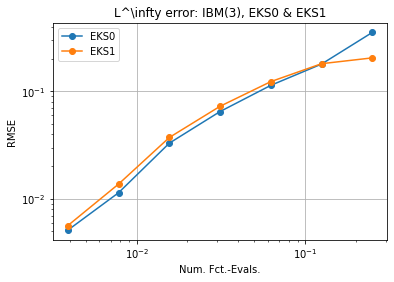

In [49]:
avgerr, avgstd = [], []
stps = np.array([0.5**i for i in range(2, 9)])
for step in stps:
    nsteps_ = int(step / 0.5**10)
    ms, cs, ts = odefiltsmooth.smoother_ivp_h(ivp1, step, which_filt="kf", which_prior="ibm1", nsteps=nsteps_)
    ms2, cs2, ts2 = odefiltsmooth.smoother_ivp_h(ivp1, step, which_filt="ekf", which_prior="ibm1", nsteps=nsteps_)
    means = ms[:, 0]
    sols = np.array([ivp1.solution(t) for t in ts])
    solsder = np.array([ivp1.rhs(t, ivp1.solution(t)) for t in ts])
    # avgerr.append(np.linalg.norm(np.abs(sols[:, 0] - means))/np.sqrt(len(means)))
    err = np.linalg.norm(sols[:, 0] - ms[:, 0], ord=np.inf)
    errder = np.linalg.norm(solsder[:, 0] - ms[:, 1], ord=np.inf)
    avgerr.append(np.maximum(err, errder))

    sols = np.array([ivp1.solution(t) for t in ts2])
    solsder = np.array([ivp1.rhs(t, ivp1.solution(t)) for t in ts2])
    err2 =  np.linalg.norm(sols[:, 0] - ms2[:, 0], ord=np.inf)
    errder2 = np.linalg.norm(solsder[:, 0] - ms2[:, 1], ord=np.inf)
    avgstd.append(np.maximum(err2, errder2))
    print(sols.shape)

plt.loglog(stps, avgerr, "o-", label="EKS0")
plt.loglog(stps, avgstd, "o-", label="EKS1")
# plt.loglog(stps, stps**4, "--", color="gray", label="O(h^3)")
plt.ylabel("RMSE")
plt.xlabel("Num. Fct.-Evals.")
plt.title("L^\infty error: IBM(3), EKS0 & EKS1")
plt.legend()
plt.grid()
plt.show()

## Higher order IBM(q) priors

Seems like IBM(1) does as expected. How do higher order IBM(q) priors fare? Note that only $q \in \{1, 2, 3\}$ is supported, since higher orders would require analytic knowledge of higher order derivatives of the ODE right-hand side function. 

In [ ]:
def error(ms, sols):
    return np.linalg.norm((sols[:, 0] - ms[:, 0]))/np.sqrt(sols[:, 0].size)

DCNST = 50
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
stps = np.array([0.5**i for i in range(4, 8)])

err_ibm1, err_ibm2, err_ibm3, err_ibm4 = [], [], [], []
for step in stps:
    ms1, __, ts1 = odefiltsmooth.smoother_ivp_h(ivp1, step, diffconst=DCNST, which_prior="ibm1", which_filt="kf")
    sols1 = np.array([ivp1.solution(t) for t in ts1])
    err_ibm1.append(error(ms1, sols1))
    
    ms2, __, ts2 = odefiltsmooth.smoother_ivp_h(ivp1, step, diffconst=DCNST, which_prior="ibm2", which_filt="kf")
    sols2 = np.array([ivp1.solution(t) for t in ts2])
    err_ibm2.append(error(ms2, sols2))
    
    ms3, __, ts3 = odefiltsmooth.smoother_ivp_h(ivp1, step, diffconst=DCNST, which_prior="ibm3", which_filt="kf")
    sols3 = np.array([ivp1.solution(t) for t in ts3])
    err_ibm3.append(error(ms3, sols3))

    
    # ms4, __, ts4 = odefiltsmooth.smoother_ivp_h(ivp1, step, diffconst=DCNST, which_prior="ibm4", which_filt="kf")
    # sols4 = np.array([ivp1.solution(t) for t in ts3])
    err_ibm4.append(0)
    # err_ibm4.append(error(ms4, sols4))

ax1.loglog(stps, np.array(err_ibm1), "o-", label="IBM(1)", alpha=0.75)
ax1.loglog(stps, np.array(err_ibm2), "o-", label="IBM(2)", alpha=0.75)
ax1.loglog(stps, np.array(err_ibm3), "o-", label="IBM(3)", alpha=0.75)
ax1.loglog(stps, np.array(err_ibm4), "o-", label="IBM(4)", alpha=0.75)

ax1.loglog(stps, stps**1, alpha=0.75, linestyle="--", color="black", label="O(h^2)")
ax1.loglog(stps, 0.1*stps**2, alpha=0.75, linestyle=":", color="black", label="O(h^3)")
ax1.loglog(stps, 10*stps**3, alpha=0.75, linestyle="-.", color="black", label="O(h^4)")
ax1.set_title("||m - x||")
ax1.set_xlabel("Fct.-Evals")
ax1.set_ylabel("Error")
ax1.legend()
ax1.grid()

plt.show()

## A Different ODE

The same results hold for a different ODE, e.g. for the linear system Eq. 8.3 in Kersting et al., 2019.

In [ ]:
def fct(t, x):
    x1, x2 = x
    return np.array([-np.pi*x2, np.pi*x1])

def jac(t, x):
    return np.array([[0, -np.pi],[np.pi, 0]])

def sol(t):
    return np.array([-np.sin(t*np.pi), np.cos(t*np.pi)])

initdist = gaussian.MultivariateGaussian(np.array([0., 1.]), 0*np.eye(2))
ivp_lin = ode.ivp.IVP([0., 5.], initdist, fct, jac=jac, sol=sol)


In [ ]:
def error(ms, sols):
    return np.linalg.norm((sols - ms))/np.sqrt(sols.size)

DCNST = 25
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
stps = np.array([0.5**i for i in range(4, 9)])

err_ibm1, err_ibm2, err_ibm3, err_ibm4 = [], [], [], []
for step in stps:
    ms1, __, ts1 = odefilter.solve_filter_h(ivp_lin, step, diffconst=DCNST, which_prior="ibm1", which_filt="kf")
    sols1 = np.array([ivp_lin.solution(t) for t in ts1])
    err_ibm1.append(error(ms1[:, [0, 2]], sols1))
    
    ms2, __, ts2 = odefilter.solve_filter_h(ivp_lin, step, diffconst=DCNST, which_prior="ibm2", which_filt="kf")
    sols2 = np.array([ivp_lin.solution(t) for t in ts2])
    err_ibm2.append(error(ms2[:, [0, 3]], sols2))
    
    ms3, __, ts3 = odefilter.solve_filter_h(ivp_lin, step, diffconst=DCNST, which_prior="ibm3", which_filt="kf")
    sols3 = np.array([ivp_lin.solution(t) for t in ts3])
    err_ibm3.append(error(ms3[:,  [0, 4]], sols3))

    # ms4, __, ts4 = odefilter.solve_filter_h(ivp, step, diffconst=DCNST, which_prior="ibm4", which_filt="kf")
    # sols4 = np.array([ivp.solution(t) for t in ts4])
    # err_ibm4.append(error(ms4, sols4))

ax1.loglog(1/stps, np.array(err_ibm1), "o-", label="IBM(1)", alpha=0.75)
ax1.loglog(1/stps, np.array(err_ibm2), "o-", label="IBM(2)", alpha=0.75)
ax1.loglog(1/stps, np.array(err_ibm3), "o-", label="IBM(3)", alpha=0.75)

ax1.loglog(1/stps, 20*stps**2, "--", alpha=0.75, color="gray", label="O(h^2)")
ax1.loglog(1/stps, 100*stps**3, "-.", alpha=0.75, color="gray", label="O(h^3)")
ax1.loglog(1/stps, 100*stps**4, ":", alpha=0.75, color="gray", label="O(h^4)")
ax1.set_title("||m - x||")
ax1.set_xlabel("Fct.-Evals")
ax1.set_ylabel("Error")
ax1.legend()
ax1.grid()

plt.show()

## Other Filters

We can do the same experiments for the UKF. Interestingly, it seems that the convergence rates somewhat hold in the same way, in fact they kick in much quicker, but numerical instability becomes a concern pretty quickly.

In [ ]:
def error(ms, sols):
    return np.linalg.norm((sols - ms))/np.sqrt(sols.size)

DCNST = 1
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
stps = np.array([0.5**i for i in range(1, 8)])

err_ibm1, err_ibm2, err_ibm3, err_ibm4 = [], [], [], []
for step in stps:
    ms1, __, ts1 = odefilter.solve_filter_h(ivp_lin, step, which_prior="ibm1", which_filt="ukf")
    sols1 = np.array([ivp_lin.solution(t) for t in ts1])
    err_ibm1.append(error(ms1[:, [0, 2]], sols1))
    
    ms2, __, ts2 = odefilter.solve_filter_h(ivp_lin, step, which_prior="ibm2", which_filt="ukf")
    sols2 = np.array([ivp_lin.solution(t) for t in ts2])
    err_ibm2.append(error(ms2[:, [0, 3]], sols2))
    
    ms3, __, ts3 = odefilter.solve_filter_h(ivp_lin, step, which_prior="ibm3", which_filt="ukf")
    sols3 = np.array([ivp_lin.solution(t) for t in ts3])
    err_ibm3.append(error(ms3[:,  [0, 4]], sols3))

    # ms4, __, ts4 = odefilter.solve_filter_h(ivp, step, diffconst=DCNST, which_prior="ibm4", which_filt="kf")
    # sols4 = np.array([ivp.solution(t) for t in ts4])
    # err_ibm4.append(error(ms4, sols4))

ax1.loglog(1/stps, np.array(err_ibm1), "o-", label="IBM(1)", alpha=0.75)
ax1.loglog(1/stps, np.array(err_ibm2), "o-", label="IBM(2)", alpha=0.75)
ax1.loglog(1/stps, np.array(err_ibm3), "o-", label="IBM(3)", alpha=0.75)

ax1.loglog(1/stps, 20*stps**2, "--", alpha=0.75, color="gray", label="O(h^2)")
ax1.loglog(1/stps, 1*stps**3, "-.", alpha=0.75, color="gray", label="O(h^3)")
ax1.loglog(1/stps, 10*stps**4, ":", alpha=0.75, color="gray", label="O(h^4)")
ax1.set_title("||m - x||")
ax1.set_xlabel("Fct.-Evals")
ax1.set_ylabel("Error")
ax1.legend()
ax1.grid()

plt.show()

In [ ]:
# This is for the IMPRS presentation, hence simplified labelling.

plt.rcParams.update({'font.size': 22})
def error(ms, sols):
    return np.linalg.norm((sols - ms))/np.sqrt(sols.size)

DCNST = 25
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
stps = np.array([0.5**i for i in range(3, 11)])

err_ibm1, err_ibm2, err_ibm3, err_ibm4 = [], [], [], []
for step in stps:
    ms1, __, ts1 = odefilter.solve_filter_h(ivp_lin, step, diffconst=DCNST, which_prior="ibm1", which_filt="kf")
    sols1 = np.array([ivp_lin.solution(t) for t in ts1])
    err_ibm1.append(error(ms1[:, [0, 2]], sols1))
    
    ms2, __, ts2 = odefilter.solve_filter_h(ivp_lin, step, diffconst=DCNST, which_prior="ibm2", which_filt="kf")
    sols2 = np.array([ivp_lin.solution(t) for t in ts2])
    err_ibm2.append(error(ms2[:, [0, 3]], sols2))
    
    ms3, __, ts3 = odefilter.solve_filter_h(ivp_lin, step, diffconst=DCNST, which_prior="ibm3", which_filt="kf")
    sols3 = np.array([ivp_lin.solution(t) for t in ts3])
    err_ibm3.append(error(ms3[:,  [0, 4]], sols3))

    # ms4, __, ts4 = odefilter.solve_filter_h(ivp, step, diffconst=DCNST, which_prior="ibm4", which_filt="kf")
    # sols4 = np.array([ivp.solution(t) for t in ts4])
    # err_ibm4.append(error(ms4, sols4))

ax1.loglog(1/stps, np.array(err_ibm1), "o-", label="Order 1", alpha=0.75, linewidth=3)
ax1.loglog(1/stps, np.array(err_ibm2), "o-", label="Order 2", alpha=0.75, linewidth=3)
ax1.loglog(1/stps, np.array(err_ibm3), "o-", label="Order 3", alpha=0.75, linewidth=3)

ax1.loglog(1/stps, 20*stps**2, "--", alpha=0.75, color="gray", label="O(h^2)", linewidth=2)
ax1.loglog(1/stps, 100*stps**3, "-.", alpha=0.75, color="gray", label="O(h^3)", linewidth=2)
ax1.loglog(1/stps, 100*stps**4, ":", alpha=0.75, color="gray", label="O(h^4)", linewidth=2)
ax1.set_xlabel("Fct.-Evals")
ax1.set_ylabel("Error")
ax1.legend()
ax1.grid()

plt.savefig("convrates_lin", dpi=300)
plt.show()

In [ ]:
initdist = RandomVariable(distribution=Dirac(0.15 * np.ones(1)))
ivp1 = ode.logistic([0.0, 1.5], initdist, params=(10, 1))

ms1, cs1, ts1 = odefiltsmooth.smoother_ivp_h(ivp1, step=0.05, which_prior="ibm2",
                                             which_filt="kf", nsteps=25)
ms2, cs2, ts2 = odefiltsmooth.smoother_ivp_h(ivp1, step=0.05, which_prior="ibm2",
                                             which_filt="ekf", nsteps=25)


plt.plot(ts1, ms1[:, 1], label="EKS0")
plt.fill_between(ts1, ms1[:, 1] - 3*np.sqrt(np.abs(cs1[:, 1, 1])), ms1[:, 1] + 3*np.sqrt(np.abs(cs1[:, 1, 1])), alpha=0.25)
plt.plot(ts2, ms2[:, 1], label="EKS1")
plt.fill_between(ts2, ms2[:, 1] - 3*np.sqrt(np.abs(cs2[:, 1, 1])), ms2[:, 1] + 3*np.sqrt(np.abs(cs2[:, 1, 1])), alpha=0.25)
plt.legend()
plt.show()